In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import nltk
import nltk.corpus

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Product Review Analysis/Mobile Reviews.csv')

In [54]:
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [55]:
df = df.drop(columns = df.columns[0])

In [56]:
df

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,Warest mobile,1.0 out of 5 stars,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [57]:
df.head()

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


# ***Data Cleaning***

In [58]:
df["Review-Title"].isna().sum()

2

In [59]:
df.dropna(subset=['Review-Title'], axis=0, inplace=True)
df["Review-Title"].isna().sum()

0

In [60]:
df["rating"].isna().sum()

0

In [61]:
df['rating'].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [62]:
df["Review-Body"].isna().sum()

616

In [63]:
df.dropna(subset=['Review-Body'], axis=0, inplace=True)
df["Review-Body"].isna().sum()

0

In [64]:
df["Product Name"].isna().sum()

0

In [65]:
df['rating_number'] = [int(i[:1]) for i in df['rating']]
df.drop('rating', axis=1, inplace=True)
df

,Review-Title,Review-Body,Product Name,rating_number
0,Worst phone ever,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2
2,Awesome look,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5
3,One plus losing is originality!!!,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3
4,Read,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1
...,...,...,...,...
23772,Batten in this rangee,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",4
23773,Good mobile,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",4
23774,Good camera,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",5
23775,Warest mobile,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",1


In [67]:
df['Product Name'].unique()

array(['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ',
       'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Samsung Galaxy M32',
       'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'],
      dtype=object)

There are eight different types of mobiles.

In [68]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
from wordcloud import WordCloud
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [70]:
df_best_reviews = df.loc[(~df['Review-Body'].isna()) & (df['rating_number']==5)]
df_worst_reviews = df.loc[(~df['Review-Body'].isna()) & (df['rating_number']==1)]

def generate_wordcloud(text):
    """
    Generate word cloud images
    """
    wc = WordCloud(collocations=False, 
                   background_color="black",
                   max_words=200).generate(text)
    
    # set the figure size
    plot.figure(figsize=[15,10])

    # plot the wordcloud
    plot.imshow(wc, interpolation="bilinear")

    # remove plot axes
    plot.axis("off")

Word cloud: 5-star reviews:


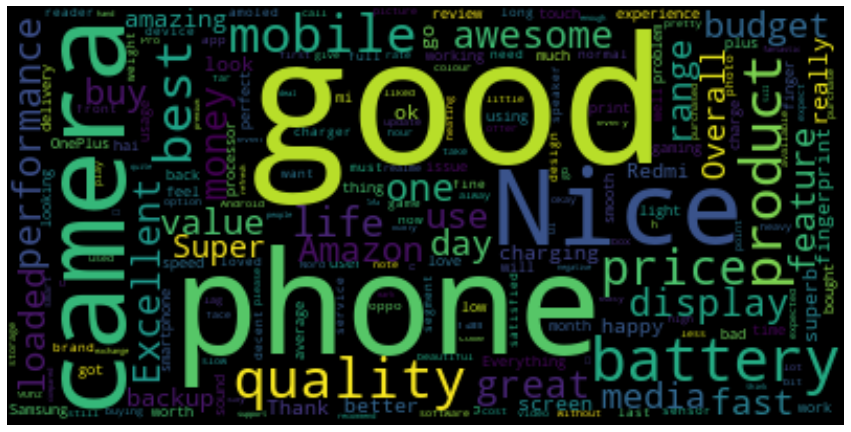

In [71]:
text_best_reviews = " ".join(df_best_reviews['Review-Body'])
print('Word cloud: 5-star reviews:')
generate_wordcloud(text_best_reviews)

Word cloud: 1-star reviews:


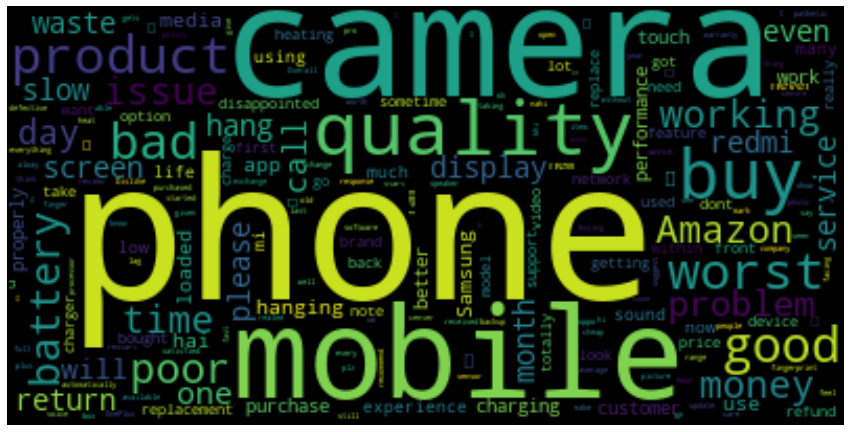

In [72]:
text_worst_reviews = " ".join(df_worst_reviews['Review-Body'])
print('Word cloud: 1-star reviews:')
generate_wordcloud(text_worst_reviews)

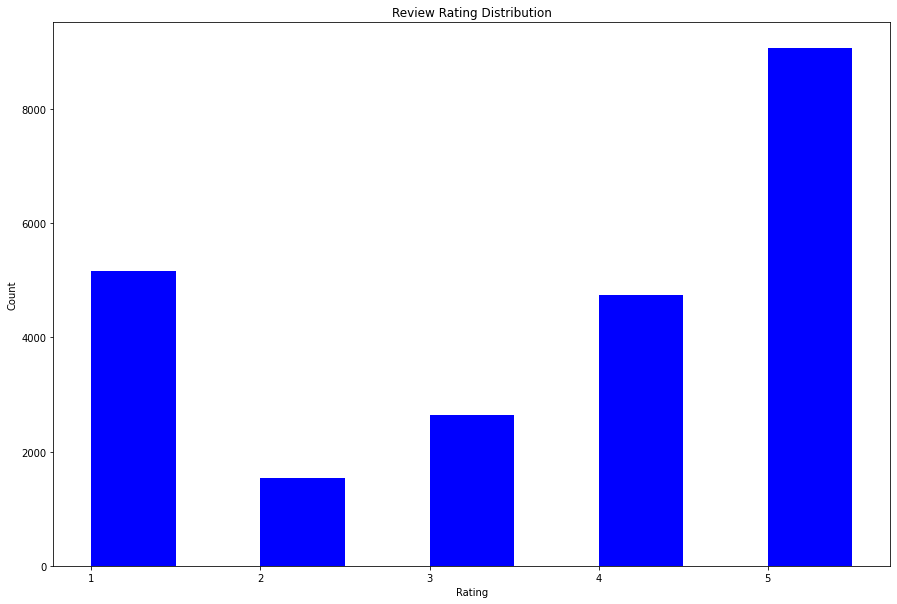

In [90]:
ax1 = df['rating_number'].plot(kind='hist', 
                          color='blue', 
                          grid=False, 
                          bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5], 
                          title='Review Rating Distribution',
                          figsize=(15,10))
ax1.set_xlabel("Rating")
ax1.set_ylabel("Count")
ax1.set_xticks([1,2,3,4,5], minor=False)

# set font size  
plot.rcParams['font.size'] = '10'

As seen from above chart, in this data we have more 5 star rated reviews, followed by 1 star & 4 star.

In [74]:
df['Review-Body'] = df['Review-Body'].astype(str)
df['review'] = df['Review-Body'].str.lower()
df

,Review-Title,Review-Body,Product Name,rating_number,review
0,Worst phone ever,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,i'm writing this review after using 3days !!!b...
2,Awesome look,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera is so good n very fast phone back look ...
3,One plus losing is originality!!!,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,the media could not be loaded.\n ...
4,Read,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,i got my delivery on 23 feb when i unboxed the...
...,...,...,...,...,...
23772,Batten in this rangee,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",4,must he bhai iss range me bas cemra thoda sa s...
23773,Good mobile,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",4,good product
23774,Good camera,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",5,good
23775,Warest mobile,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",1,don't buy this mobile phone money weast screen...


In [75]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['review'] = df['review'].apply(lambda text: remove_urls(text))
df.head()

,Review-Title,Review-Body,Product Name,rating_number,review
0,Worst phone ever,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,i'm writing this review after using 3days !!!b...
2,Awesome look,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera is so good n very fast phone back look ...
3,One plus losing is originality!!!,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,the media could not be loaded.\n ...
4,Read,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,i got my delivery on 23 feb when i unboxed the...


In [76]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['review_wo_punct'] = df['review'].apply(lambda text: remove_punctuation(text))
df.head()

,Review-Title,Review-Body,Product Name,rating_number,review,review_wo_punct
0,Worst phone ever,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem,hang problem
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,i'm writing this review after using 3days !!!b...,im writing this review after using 3days be to...
2,Awesome look,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera is so good n very fast phone back look ...,camera is so good n very fast phone back look ...
3,One plus losing is originality!!!,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,the media could not be loaded.\n ...,the media could not be loaded\n ...
4,Read,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,i got my delivery on 23 feb when i unboxed the...,i got my delivery on 23 feb when i unboxed the...


In [77]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [78]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['review_wo_stop'] = df['review_wo_punct'].apply(lambda text: remove_stopwords(text))
df.head()

,Review-Title,Review-Body,Product Name,rating_number,review,review_wo_punct,review_wo_stop
0,Worst phone ever,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem,hang problem,hang problem
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,i'm writing this review after using 3days !!!b...,im writing this review after using 3days be to...,im writing review using 3days honest normal an...
2,Awesome look,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera is so good n very fast phone back look ...,camera is so good n very fast phone back look ...,camera good n fast phone back look awesomewith...
3,One plus losing is originality!!!,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,the media could not be loaded.\n ...,the media could not be loaded\n ...,media could loaded it’s average product decent...
4,Read,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,i got my delivery on 23 feb when i unboxed the...,i got my delivery on 23 feb when i unboxed the...,got delivery 23 feb unboxed phone display dama...


In [79]:
cnt = Counter()
for text in df['review_wo_stop'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

[('good', 9836),
 ('phone', 8527),
 ('camera', 6128),
 ('quality', 4335),
 ('battery', 3457),
 ('mobile', 3096),
 ('product', 2743),
 ('nice', 2144),
 ('price', 1912),
 ('buy', 1785),
 ('like', 1781),
 ('dont', 1484),
 ('bad', 1464),
 ('also', 1441),
 ('best', 1431),
 ('life', 1345),
 ('one', 1340),
 ('display', 1305),
 ('money', 1246),
 ('performance', 1107)]

In [80]:
df['review_wo_stop'] = df['review_wo_stop'].str.replace('\d+', '')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Review-Title,Review-Body,Product Name,rating_number,review,review_wo_punct,review_wo_stop
0,Worst phone ever,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem,hang problem,hang problem
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,i'm writing this review after using 3days !!!b...,im writing this review after using 3days be to...,im writing review using days honest normal and...
2,Awesome look,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera is so good n very fast phone back look ...,camera is so good n very fast phone back look ...,camera good n fast phone back look awesomewith...
3,One plus losing is originality!!!,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,the media could not be loaded.\n ...,the media could not be loaded\n ...,media could loaded it’s average product decent...
4,Read,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,i got my delivery on 23 feb when i unboxed the...,i got my delivery on 23 feb when i unboxed the...,got delivery feb unboxed phone display damage...


In [81]:
df.drop(['Review-Body','review','review_wo_punct'], axis=1, inplace=True)
df.head()

,Review-Title,Product Name,rating_number,review_wo_stop
0,Worst phone ever,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem
1,Ok !!! Not up to the mark,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,im writing review using days honest normal and...
2,Awesome look,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera good n fast phone back look awesomewith...
3,One plus losing is originality!!!,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,media could loaded it’s average product decent...
4,Read,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,got delivery feb unboxed phone display damage...


In [82]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

Y = df['review_wo_stop']
df['POS_tagged'] = Y.apply(token_stop_pos)
df.head()


,Review-Title,Product Name,rating_number,review_wo_stop,POS_tagged
0,Worst phone ever,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem,"[(hang, n), (problem, n)]"
1,Ok !!! Not up to the mark,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,im writing review using days honest normal and...,"[(im, n), (writing, v), (review, n), (using, v..."
2,Awesome look,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera good n fast phone back look awesomewith...,"[(camera, n), (good, a), (n, n), (fast, v), (p..."
3,One plus losing is originality!!!,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,media could loaded it’s average product decent...,"[(media, n), (could, None), (loaded, v), (’, n..."
4,Read,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,got delivery feb unboxed phone display damage...,"[(got, v), (delivery, n), (feb, n), (unboxed, ..."


In [83]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
df['Lemma'] = df['POS_tagged'].apply(lemmatize)
df.head()

,Review-Title,Product Name,rating_number,review_wo_stop,POS_tagged,Lemma
0,Worst phone ever,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem,"[(hang, n), (problem, n)]",hang problem
1,Ok !!! Not up to the mark,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,im writing review using days honest normal and...,"[(im, n), (writing, v), (review, n), (using, v...",im write review use day honest normal androi...
2,Awesome look,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera good n fast phone back look awesomewith...,"[(camera, n), (good, a), (n, n), (fast, v), (p...",camera good n fast phone back look awesomewi...
3,One plus losing is originality!!!,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,media could loaded it’s average product decent...,"[(media, n), (could, None), (loaded, v), (’, n...",medium could load ’ average product decent d...
4,Read,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,got delivery feb unboxed phone display damage...,"[(got, v), (delivery, n), (feb, n), (unboxed, ...",get delivery feb unboxed phone display damag...


# ***Using Vader for analysing sentiment of the cleaned reviews***

In [84]:
sent_analyser = SentimentIntensityAnalyzer()

# function to calculate polarity
def getPolarity(text):
    return sent_analyser.polarity_scores(text)["compound"]

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [85]:
df['Polarity'] = df['Lemma'].apply(getPolarity)
df['Sentiment'] = df['Polarity'].apply(analysis)
df.drop(['POS_tagged','Lemma'], axis=1, inplace=True)
df.head()

,Review-Title,Product Name,rating_number,review_wo_stop,Polarity,Sentiment
0,Worst phone ever,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,hang problem,-0.4019,Negative
1,Ok !!! Not up to the mark,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2,im writing review using days honest normal and...,0.3818,Positive
2,Awesome look,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5,camera good n fast phone back look awesomewith...,0.9774,Positive
3,One plus losing is originality!!!,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3,media could loaded it’s average product decent...,0.9712,Positive
4,Read,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,got delivery feb unboxed phone display damage...,0.4404,Positive


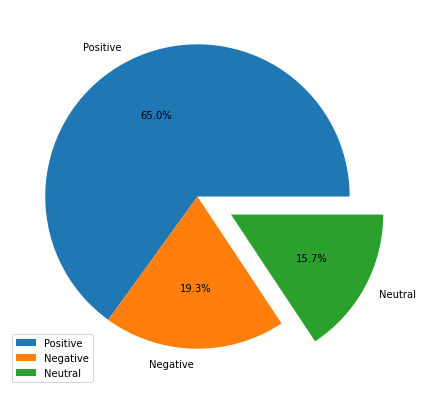

In [86]:
sent_counts = df['Sentiment'].value_counts()

plot.figure(figsize=(10,7))
plot.pie(sent_counts.values, labels=sent_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)
plot.legend();

As seen from above chart, we see 65% Positive Sentiments, 19.3% Negative Sentiments & 15.7% Neutral Sentiments.

In [87]:

sent_counts

Positive    15060
Negative     4468
Neutral      3631
Name: Sentiment, dtype: int64

In [88]:
phone_df = df[['Product Name','Sentiment']]
phone_df

,Product Name,Sentiment
0,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Negative
1,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Positive
2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Positive
3,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Positive
4,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Positive
...,...,...
23772,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Neutral
23773,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Positive
23774,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Positive
23775,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",Positive


In [89]:
phone_df.groupby(['Product Name','Sentiment'])['Sentiment'].count()

Product Name                                                Sentiment
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)            Negative      589
                                                            Neutral       718
                                                            Positive     2966
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)  Negative      517
                                                            Neutral       571
                                                            Positive     2308
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM               Negative      859
                                                            Neutral       675
                                                            Positive     2063
Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)         Negative      926
                                                            Neutral       519
                                                            Positive    

From above groupby table, we see:

Positive Sentiments Top 3:

a) Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) - 3005

b) OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage) - 2966

c) OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage) - 2308

Neutral Sentiments Top 3:

a) OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage) - 718

b) Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM - 675

c) OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage) - 571

Negative Sentiments Top 3:

a) Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) - 926

b) Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM - 859

c) Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage) - 613